# Part 4 - Building Churn Prediction Model

## Importing Data and Libraries 

In [1]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division

In [2]:
data = pd.read_csv('TransformedDataset/transformed_user_summary_segemented_v2.csv')

In [3]:
data.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,is_discount,BestPlan,active_days_per_month,total_usage_time_per_month,total_unique_songs_played_per_month,...,Percent_Songs_Played_100,is_churn,RecencyCluster,FrequencyCluster,MonetaryCluster,SongsPlayedFrequencyCluster,OverallScore,Segment,Plan,drop
0,187,1788,219,410,0,0,410,12,48210.151,364,...,23.739586,1,1,2,2,0,5,Mid-Value,Yearly,0
1,501,1788,263,410,0,0,410,12,50496.753,167,...,91.490592,1,1,2,2,0,5,Mid-Value,Yearly,0
2,2184,1788,239,410,0,0,410,14,36132.039,212,...,59.349542,1,1,2,2,0,5,Mid-Value,Yearly,0
3,3550,1788,210,410,0,0,410,13,42064.803,157,...,54.224399,1,1,2,2,0,5,Mid-Value,Yearly,0
4,4465,1788,278,410,0,0,410,18,65668.010,312,...,83.163338,1,1,2,2,0,5,Mid-Value,Yearly,0


In [4]:
data.shape

(36403, 22)

## Label Encoding, Scaling and Test Train Split 

In [5]:
from  sklearn.model_selection  import  train_test_split 
X = data.drop('is_churn',axis=1)
X = X.drop(['OverallScore','RecencyCluster','FrequencyCluster','MonetaryCluster','SongsPlayedFrequencyCluster','msno','BestPlan','Monetary','drop'],axis=1)
y= data['is_churn']

In [6]:
cols = X.columns

In [7]:
objList = X.select_dtypes(include = "object").columns #
print (objList)

Index(['Segment', 'Plan'], dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder #encoder package of sklearn
le = LabelEncoder() #le variable has been assigned a labelencoder function

for Shiv in objList:
    X[Shiv] = le.fit_transform(X[Shiv].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36403 entries, 0 to 36402
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Recency                              36403 non-null  int64  
 1   Frequency                            36403 non-null  int64  
 2   is_auto_renew                        36403 non-null  int64  
 3   is_discount                          36403 non-null  int64  
 4   active_days_per_month                36403 non-null  int64  
 5   total_usage_time_per_month           36403 non-null  float64
 6   total_unique_songs_played_per_month  36403 non-null  int64  
 7   Percent_Songs_Played_25              36403 non-null  float64
 8   Percent_Songs_Played_50              36403 non-null  float64
 9   Percent_Songs_Played_100             36403 non-null  float64
 10  Segment                              36403 non-null  int32  
 11  Plan                        

In [9]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [10]:
X = pd.DataFrame(X, columns=cols)

In [11]:
X

,Recency,Frequency,is_auto_renew,is_discount,active_days_per_month,total_usage_time_per_month,total_unique_songs_played_per_month,Percent_Songs_Played_25,Percent_Songs_Played_50,Percent_Songs_Played_100,Segment,Plan
0,5.562329,4.802633,-2.553376,-0.064108,0.389943,0.014170,0.524546,0.689825,2.378369,-1.627095,2.605203,5.811177
1,6.777825,4.802633,-2.553376,-0.064108,0.389943,0.037241,-0.059324,-0.878969,-0.562914,1.035511,2.605203,5.811177
2,6.114827,4.802633,-2.553376,-0.064108,0.645609,-0.107696,0.074047,0.299632,-0.190878,-0.227628,2.605203,5.811177
3,5.313705,4.802633,-2.553376,-0.064108,0.517776,-0.047836,-0.088962,0.109970,0.571018,-0.429046,2.605203,5.811177
4,7.192198,4.802633,-2.553376,-0.064108,1.156941,0.190317,0.370428,-0.630147,-0.347369,0.708251,2.605203,5.811177
...,...,...,...,...,...,...,...,...,...,...,...,...
36398,0.092600,-0.265055,0.391638,-0.064108,2.690938,8.188326,6.315823,-0.838569,-0.546714,1.020135,2.605203,-0.208265
36399,0.230725,-0.265055,0.391638,-0.064108,2.690938,8.988996,8.769855,-0.989183,-0.559805,1.202347,2.605203,-0.208265
36400,0.092600,-0.265055,0.391638,-0.064108,2.690938,8.545959,4.611635,-0.749388,-0.442543,0.923717,2.605203,-0.208265
36401,0.258350,-0.265055,0.391638,-0.064108,2.690938,7.822495,4.214485,-0.891642,-0.514353,1.057497,2.605203,-0.208265


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

## Churn Prediction Model Training 

### K Nearest Neighbors 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train) #training data and  has been provided to the algorithm

knn.score(X_train,y_train)#the data we are passing will be considered for the accuracy


print("Accuracy on training set: {:.2f}".format(knn.score(X_train, y_train)*100))

print("Accuracy on testing set: {:.2f}".format(knn.score(X_test, y_test)*100))

Accuracy on training set: 94.47
Accuracy on testing set: 78.85


In [15]:
y_pred = knn.predict(X_test)

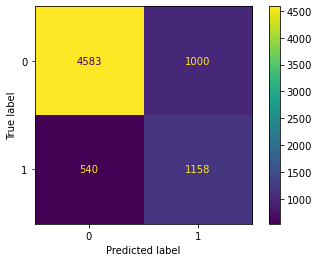

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [17]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.811107419189606

In [18]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.7884905919516549

In [19]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.7965626417595963

### Decision Tree Classifier 

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy",max_depth=25)
#tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

print("Accuracy on testing set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.917
Accuracy on testing set: 0.899


Feature importances:
[3.17989325e-01 7.26076895e-03 1.50962053e-03 5.32088787e-04
 4.59294174e-01 9.77124200e-02 3.16825607e-02 2.55790483e-02
 2.78755476e-02 2.98833703e-02 2.06644151e-04 4.74431866e-04]


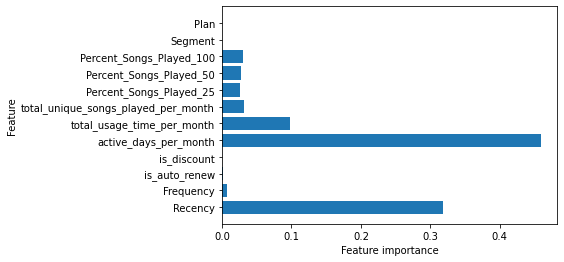

In [21]:
print("Feature importances:\n{}".format(tree.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(tree)

In [22]:
y_pred = tree.predict(X_test)

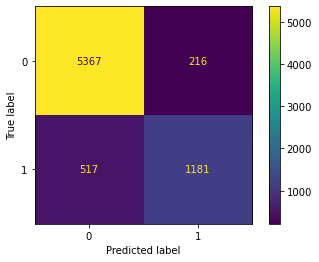

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()
plt.show()

### Random Forest Classifier 

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators= 6, max_depth=50)

forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.985
Accuracy on test set: 0.906


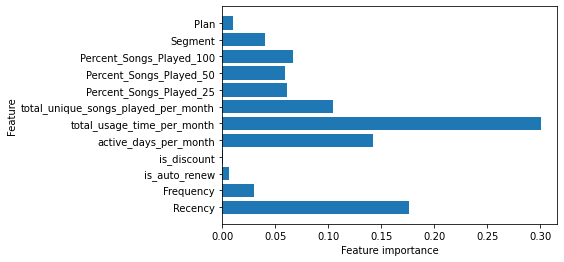

In [25]:
plot_feature_importances(forest)

In [26]:
y_pred = forest.predict(X_test)

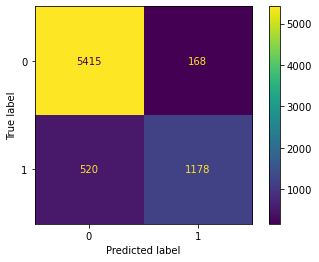

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot()
plt.show()

### Gradient Boosting Classifier 

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.1,max_depth=7)

gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))

print("GBRT Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.933
GBRT Accuracy on test set: 0.926


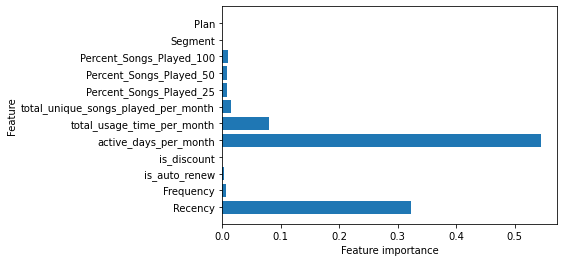

In [29]:
plot_feature_importances(gbrt)

In [30]:
y_pred = gbrt.predict(X_test)

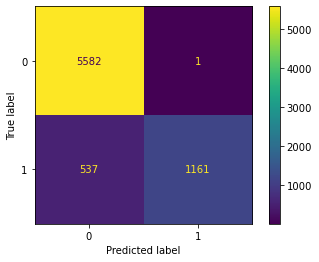

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot()
plt.show()

### XGBoost Classifier 

In [32]:
import xgboost as xgb
xgclf= xgb.XGBClassifier(learning_rate=0.1)
xgclf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(xgclf.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(xgclf.score(X_test, y_test)))

Accuracy on training set: 0.921
Accuracy on test set: 0.926


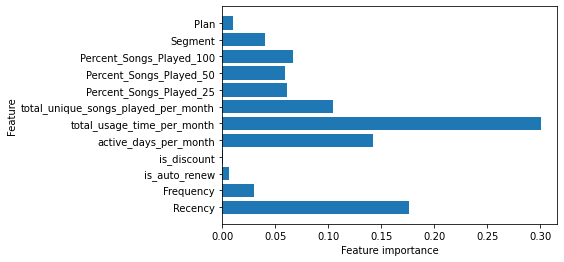

In [33]:
plot_feature_importances(forest)

In [34]:
y_pred = xgclf.predict(X_test)

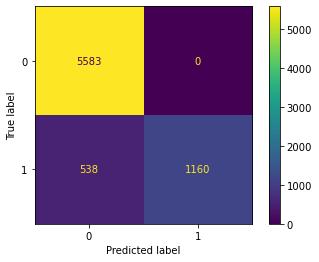

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot()
plt.show()

In [36]:
pred_prob1 = knn.predict_proba(X_test)
pred_prob2 = tree.predict_proba(X_test)
pred_prob3 = forest.predict_proba(X_test)
pred_prob4 = xgclf.predict_proba(X_test)

In [37]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [38]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.7893997468758749 0.8255298507352478 0.8377380580919656 0.8429687907109902


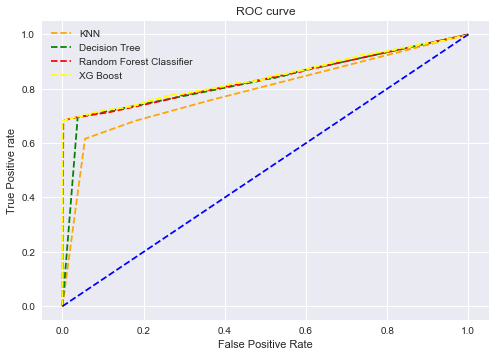

In [39]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='XG Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
#plt.savefig('ROC',dpi=300)
plt.show();

### Exporting The Results 

In [51]:
dataToPredict = data

In [52]:
dataToPredict.head()

,msno,Monetary,Recency,Frequency,is_auto_renew,is_discount,BestPlan,active_days_per_month,total_usage_time_per_month,total_unique_songs_played_per_month,...,Percent_Songs_Played_100,is_churn,RecencyCluster,FrequencyCluster,MonetaryCluster,SongsPlayedFrequencyCluster,OverallScore,Segment,Plan,drop
0,187,1788,219,410,0,0,410,12,48210.151,364,...,23.739586,1,1,2,2,0,5,Mid-Value,Yearly,0
1,501,1788,263,410,0,0,410,12,50496.753,167,...,91.490592,1,1,2,2,0,5,Mid-Value,Yearly,0
2,2184,1788,239,410,0,0,410,14,36132.039,212,...,59.349542,1,1,2,2,0,5,Mid-Value,Yearly,0
3,3550,1788,210,410,0,0,410,13,42064.803,157,...,54.224399,1,1,2,2,0,5,Mid-Value,Yearly,0
4,4465,1788,278,410,0,0,410,18,65668.010,312,...,83.163338,1,1,2,2,0,5,Mid-Value,Yearly,0


In [54]:
dataToPredict = dataToPredict.drop(['OverallScore','RecencyCluster','FrequencyCluster','MonetaryCluster','SongsPlayedFrequencyCluster','BestPlan','Monetary','drop','is_churn'],axis=1)

In [55]:
result = pd.DataFrame()

In [56]:
result['msno']=dataToPredict['msno']

In [57]:
dataToPredict = dataToPredict.drop(['msno'],axis=1)

In [59]:
objList = dataToPredict.select_dtypes(include = "object").columns #
print (objList)

Index(['Segment', 'Plan'], dtype='object')


In [60]:
from sklearn.preprocessing import LabelEncoder #encoder package of sklearn
le = LabelEncoder() #le variable has been assigned a labelencoder function

for Shiv in objList:
    dataToPredict[Shiv] = le.fit_transform(dataToPredict[Shiv].astype(str))

print (dataToPredict.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36403 entries, 0 to 36402
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Recency                              36403 non-null  int64  
 1   Frequency                            36403 non-null  int64  
 2   is_auto_renew                        36403 non-null  int64  
 3   is_discount                          36403 non-null  int64  
 4   active_days_per_month                36403 non-null  int64  
 5   total_usage_time_per_month           36403 non-null  float64
 6   total_unique_songs_played_per_month  36403 non-null  int64  
 7   Percent_Songs_Played_25              36403 non-null  float64
 8   Percent_Songs_Played_50              36403 non-null  float64
 9   Percent_Songs_Played_100             36403 non-null  float64
 10  Segment                              36403 non-null  int32  
 11  Plan                        

In [61]:
from sklearn.preprocessing import StandardScaler
dataToPredict = StandardScaler().fit_transform(dataToPredict)

In [62]:
result['Churn'] = xgclf.predict(dataToPredict)

In [63]:
prediction_of_probability = xgclf.predict_proba(dataToPredict)

In [64]:
result['Probability of Churn = Yes'] = prediction_of_probability[:,1]

In [65]:
result['Probability of Churn = No'] = prediction_of_probability[:,0]

In [66]:
result.head()

,msno,Churn,Probability of Churn = Yes,Probability of Churn = No
0,187,1,0.997562,0.002438
1,501,1,0.998025,0.001975
2,2184,1,0.998371,0.001629
3,3550,1,0.998022,0.001978
4,4465,1,0.999445,0.000555


In [67]:
result['Probability of Churn = Yes'].unique()

array([0.9975618 , 0.9980248 , 0.9983707 , ..., 0.99967945, 0.9954509 ,
       0.9997305 ], dtype=float32)

In [68]:
result.to_csv('ResultDataset/churn_results.csv',index=False)